## Домашняя работа №7

In [222]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [204]:
X, y = load_iris(return_X_y=True)
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [205]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

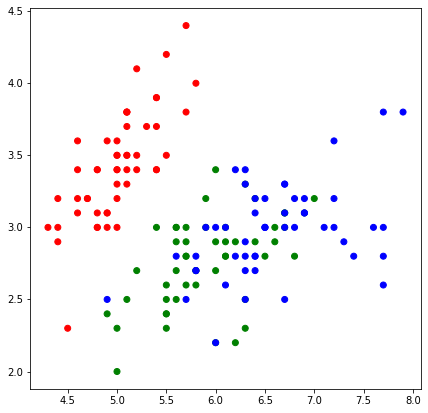

In [206]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [207]:
def e_metrics(x1, x2):
    
    return np.sqrt(np.sum((x2-x1)**2))

Реализуем алгоритм поиска k ближайших соседей.

In [208]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += d[0] * k
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [209]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [210]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.900


Построим график распределения классов.

In [211]:
for n in range(1, 11):
    y_pred = knn(X_train, y_train, X_test, n)
    print(f'Точность алгоритма при k = {n}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.467
Точность алгоритма при k = 2: 0.700
Точность алгоритма при k = 3: 0.767
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.900
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 8: 0.767
Точность алгоритма при k = 9: 0.833
Точность алгоритма при k = 10: 0.833


### Странно, что алгоритм работает лучше, даже если добавлять вес классу простым умножением дистанции на k, ибо ,умножая меньшую дистанцию (что лучше), на константу, мы получим меньший вклад.

In [212]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

<ipython-input-212-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


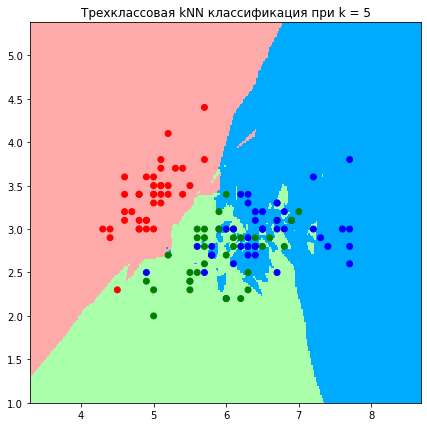

In [213]:
get_graph(X_train, y_train, k)

In [214]:
def knn_2(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            if d[0] == 0:
                classes[d[1]] += 100000
            else:
                classes[d[1]] += 1/d[0] * k
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [215]:
for n in range(1, 11):
    y_pred = knn_2(X_train, y_train, X_test, n)
    print(f'Точность алгоритма при k = {n}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.800
Точность алгоритма при k = 5: 0.833
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.767
Точность алгоритма при k = 8: 0.800
Точность алгоритма при k = 9: 0.833
Точность алгоритма при k = 10: 0.833


**Если же добавлять обратное расстояние умноженное на k, то алгоритм показывает худшие результаты.**

## Проверим алгоритм на другой выборке по iris-dataset.

In [216]:
X, y = load_iris(return_X_y=True)
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, 1:3]

In [217]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

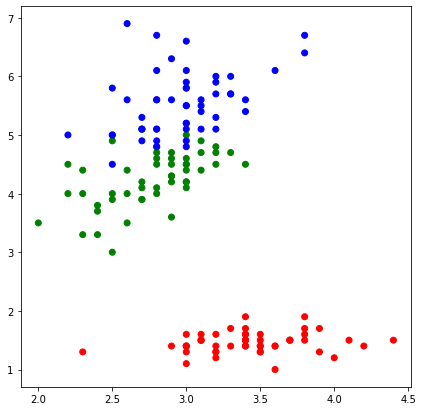

In [218]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [219]:
for n in range(1, 11):
    y_pred = knn(X_train, y_train, X_test, n)
    print(f'Точность алгоритма при k = {n}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.833
Точность алгоритма при k = 2: 0.867
Точность алгоритма при k = 3: 0.933
Точность алгоритма при k = 4: 0.933
Точность алгоритма при k = 5: 0.967
Точность алгоритма при k = 6: 0.967
Точность алгоритма при k = 7: 0.967
Точность алгоритма при k = 8: 0.967
Точность алгоритма при k = 9: 0.933
Точность алгоритма при k = 10: 0.967


In [220]:
for n in range(1, 11):
    y_pred = knn_2(X_train, y_train, X_test, n)
    print(f'Точность алгоритма при k = {n}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.933
Точность алгоритма при k = 2: 0.900
Точность алгоритма при k = 3: 0.967
Точность алгоритма при k = 4: 0.967
Точность алгоритма при k = 5: 0.967
Точность алгоритма при k = 6: 0.967
Точность алгоритма при k = 7: 0.967
Точность алгоритма при k = 8: 0.967
Точность алгоритма при k = 9: 0.967
Точность алгоритма при k = 10: 0.967


<ipython-input-212-a1d024d4c536>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


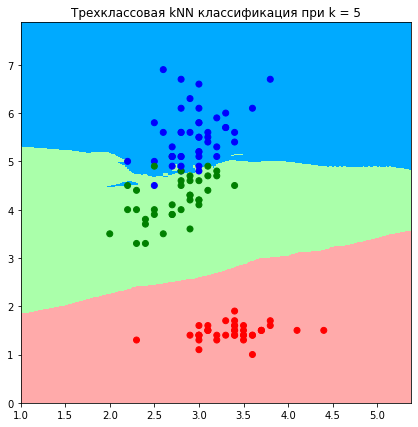

In [221]:
get_graph(X_train, y_train, k)